## Installing Required Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow dmba xgboost


## Importing Libraries

In [ ]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn models
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# TensorFlow for ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")


## Importing the Data

In [ ]:
# Loading the dataset
data_path = "kc_house_data.csv"
housing_df = pd.read_csv(data_path)

# Inspecting the dataset
print(housing_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# displaying the top 5 sample data
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## Preprocessing and Cleaning

In [ ]:
# checking the null values
housing_df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


sqft_above column has 2 missing entries

In [ ]:
# Dropping rows with null values
housing_df = housing_df.dropna()

In [ ]:
# dataset overview
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long       

In [ ]:
# Converting 'date' column to year
housing_df['date'] = pd.to_datetime(housing_df['date']).dt.year

In [ ]:
# checking the date column
housing_df['date']

,date
0,2014
1,2014
2,2015
3,2014
4,2015
...,...
21608,2014
21609,2015
21610,2014
21611,2015


In [ ]:
# Dropping the 'id' column as it is a unique identifier and does not contribute to predictive modeling
del housing_df['id']

In [ ]:
# Displaying cleaned dataset
print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21611 non-null  int32  
 1   price          21611 non-null  float64
 2   bedrooms       21611 non-null  int64  
 3   bathrooms      21611 non-null  float64
 4   sqft_living    21611 non-null  int64  
 5   sqft_lot       21611 non-null  int64  
 6   floors         21611 non-null  float64
 7   waterfront     21611 non-null  int64  
 8   view           21611 non-null  int64  
 9   condition      21611 non-null  int64  
 10  grade          21611 non-null  int64  
 11  sqft_above     21611 non-null  float64
 12  sqft_basement  21611 non-null  int64  
 13  yr_built       21611 non-null  int64  
 14  yr_renovated   21611 non-null  int64  
 15  zipcode        21611 non-null  int64  
 16  lat            21611 non-null  float64
 17  long           21611 non-null  float64
 18  sqft_living

## Exploratory Data Analysis (EDA)

               date         price      bedrooms     bathrooms   sqft_living  \
count  21611.000000  2.161100e+04  21611.000000  21611.000000  21611.000000   
mean    2014.322937  5.400850e+05      3.370830      2.114791   2079.853454   
std        0.467610  3.671430e+05      0.930092      0.770157    918.422406   
min     2014.000000  7.500000e+04      0.000000      0.000000    290.000000   
25%     2014.000000  3.217250e+05      3.000000      1.750000   1426.000000   
50%     2014.000000  4.500000e+05      3.000000      2.250000   1910.000000   
75%     2015.000000  6.450000e+05      4.000000      2.500000   2550.000000   
max     2015.000000  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161100e+04  21611.000000  21611.000000  21611.000000  21611.000000   
mean   1.510771e+04      1.494332      0.007542      0.234325      3.409421   
std    4.142235e+04      0.540003      0.086521    

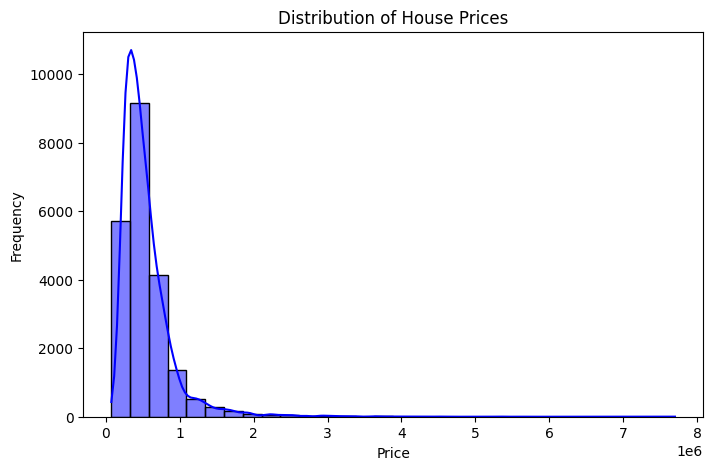

In [ ]:
# Descriptive statistics
print(housing_df.describe())

# Distribution of target variable (price)
plt.figure(figsize=(8, 5))
sns.histplot(housing_df['price'], kde=True, bins=30, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


The distribution is heavily right-skewed, with a few properties priced above $2,000,000

<Axes: xlabel='bedrooms', ylabel='count'>

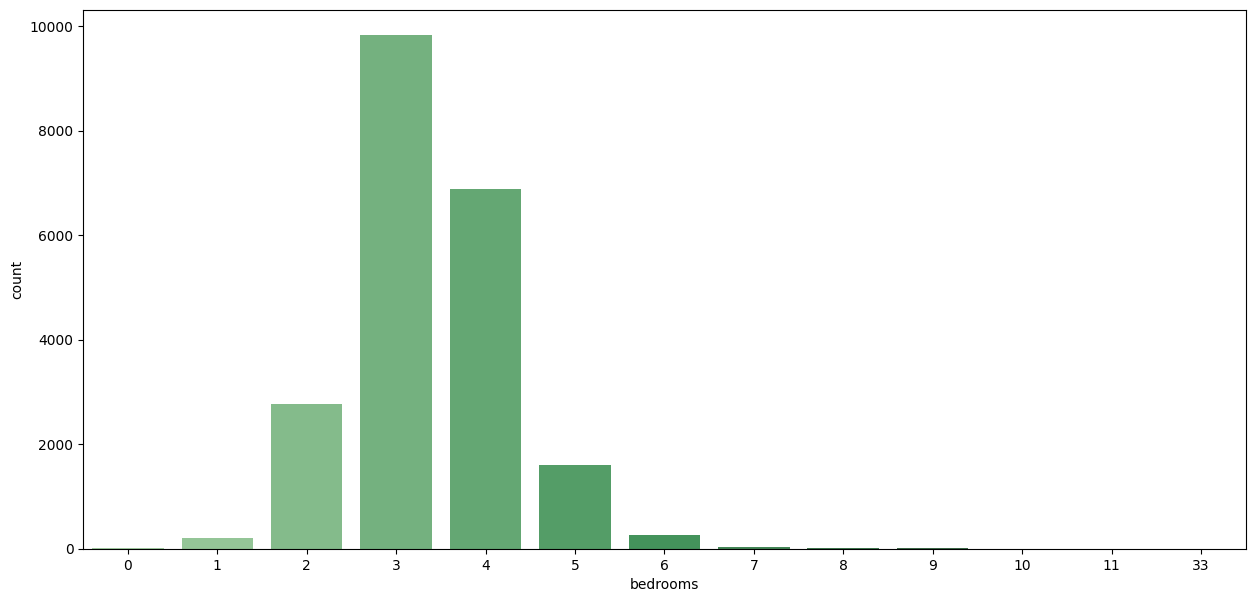

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=housing_df['bedrooms'], palette = 'Greens_d')


Most houses have 3 or 4 bedrooms, with a sharp decline in frequency for houses with more than 5 bedrooms

<Axes: xlabel='floors', ylabel='count'>

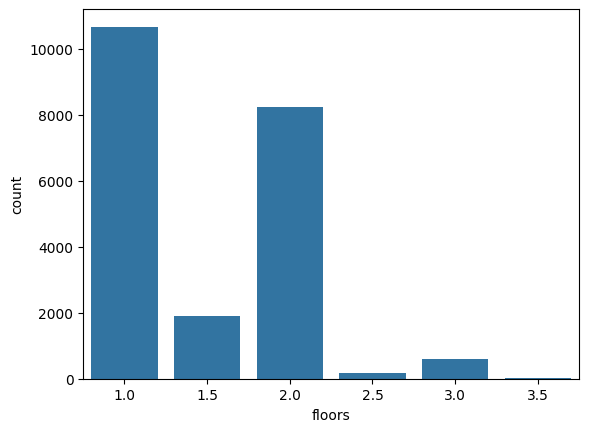

In [ ]:
sns.countplot(x=housing_df['floors'])

The bar chart shows the distribution of houses based on the number of floors. The majority of houses have either 1 or 2 floors, with 1-floor houses being the most common. Houses with 2.5, 3, or more floors are relatively rare in the dataset.

<Axes: xlabel='bathrooms', ylabel='count'>

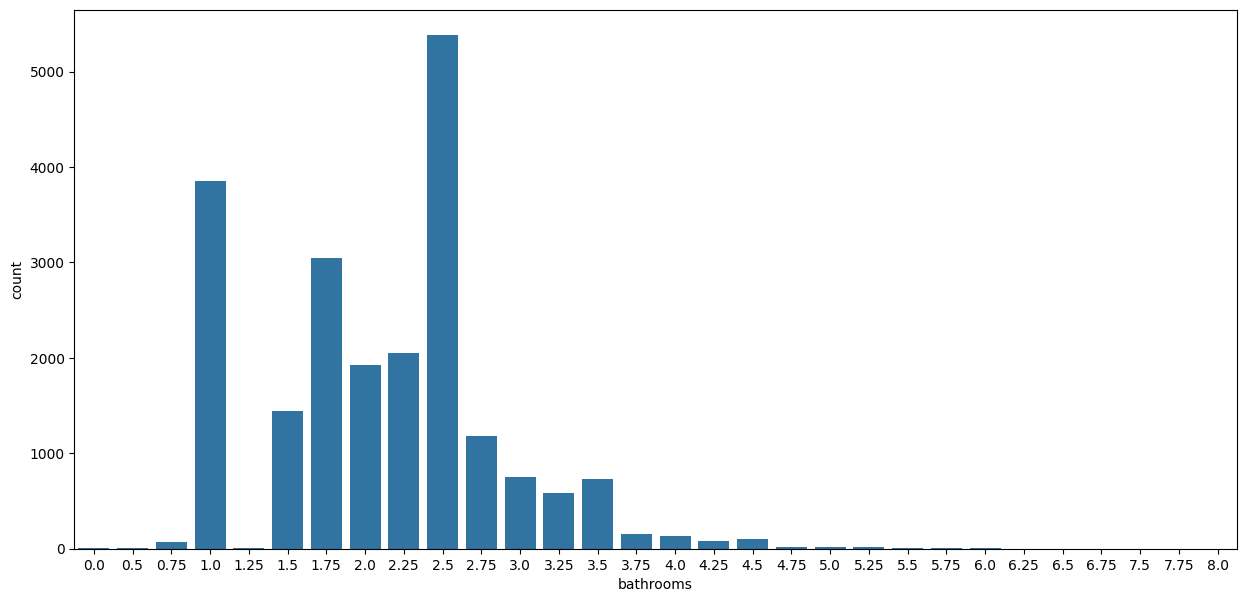

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x=housing_df['bathrooms'])

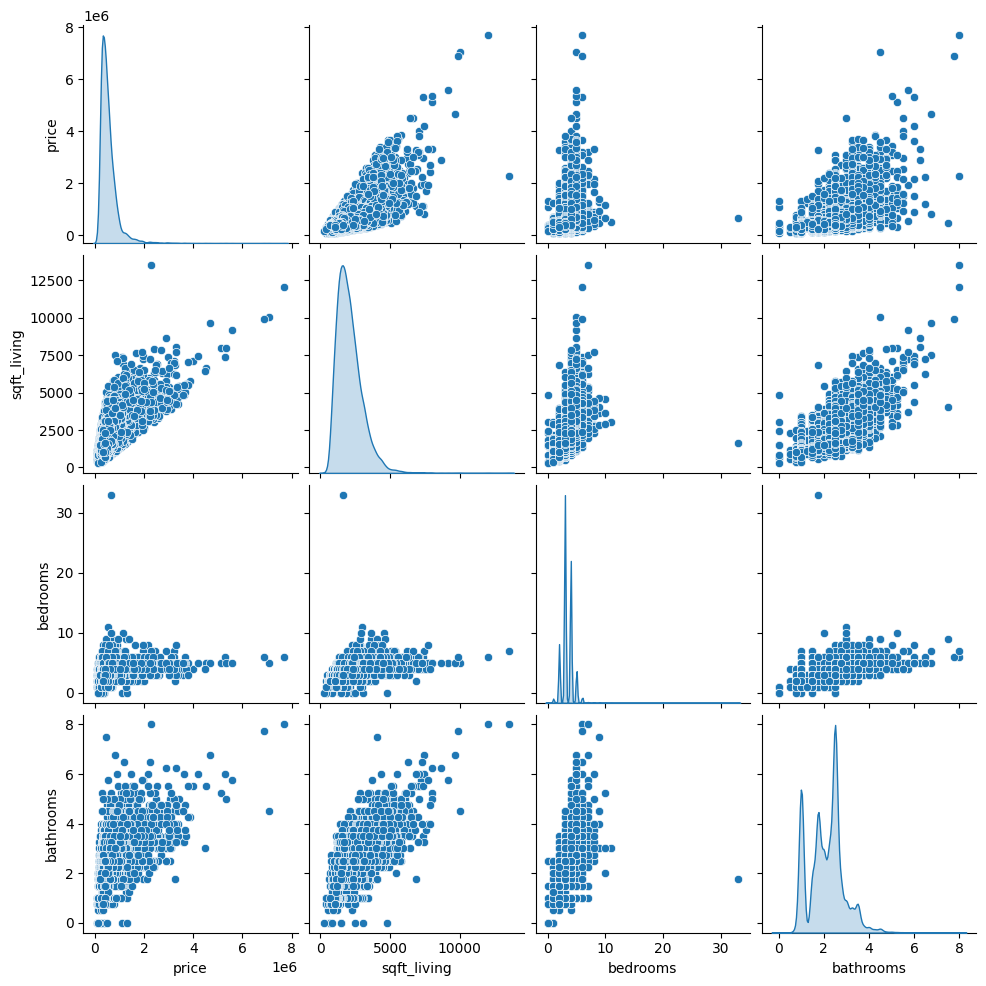

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of features
selected_features = ['price', 'sqft_living', 'bedrooms', 'bathrooms']

# Plot the pairplot for selected features
sns.pairplot(housing_df[selected_features], diag_kind='kde')
plt.show()

Observations:
# 1. 'sqft_living' and 'price' appear to have a positive linear relationship.
# 2. 'bathrooms' and 'price' also show a positive correlation, though less strong.
# 3. 'bedrooms' and 'price' have a weaker relationship.
# 4. The distributions of 'price' and 'sqft_living' are skewed, indicating the need for scaling or transformation.

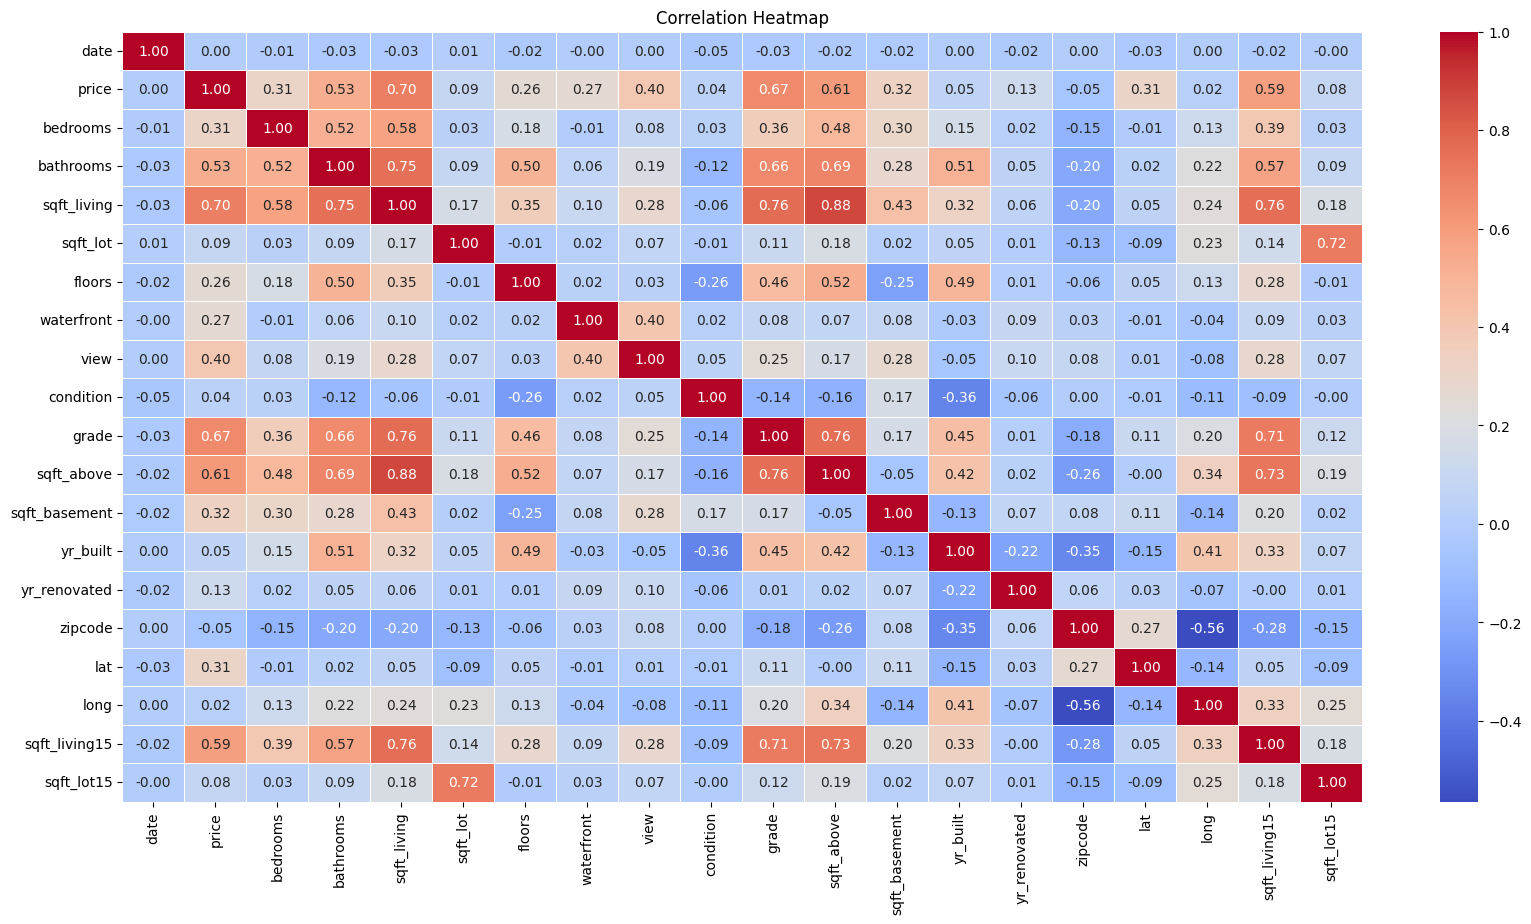

In [ ]:
# Heatmap for feature correlations
plt.figure(figsize=(20, 10))
correlation_matrix = housing_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 1. 'price' has a strong positive correlation with 'sqft_living' (0.70), 'grade' (0.67), and 'sqft_above' (0.60).
# 2. 'price' has a moderate correlation with 'bathrooms' (0.52) and 'sqft_living15' (0.59).
# 3. 'sqft_basement' has a negligible correlation with 'price', suggesting it might have a minimal impact.
# 4. 'zipcode' shows a very weak correlation with 'price', indicating it may not be a significant predictor.
# 5. Features like 'condition' and 'yr_built' show low correlation with 'price', meaning their impact might be limited.
# 6. 'sqft_living' and 'sqft_above' are highly correlated (0.88), which could lead to multicollinearity in models.
# **Dropping 'sqft_above' column due to high correlation with 'sqft_living' (correlation: 0.88)**.

In [ ]:
# List of columns to drop based on correlation analysis
columns_to_drop = ['sqft_above']

# Drop the columns
housing_df = housing_df.drop(columns=columns_to_drop)

#print(f"Remaining columns: {housing_df.columns.tolist()}")


## Train-Validation-Test Split and Scaling

In [ ]:
# Split into features (X) and target (y)
X = housing_df.drop(columns=["price"])
y = housing_df["price"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split train data into train (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
from sklearn.preprocessing import RobustScaler
# Standardize the data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


## Training Regression Models

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [ ]:
# Define models
models = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
}

# Training and evaluating models
traditional_r2_results = []
n = len(y_valid)  # Number of validation samples

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_valid = model.predict(X_valid_scaled)

    # R-squared
    r2 = r2_score(y_valid, y_pred_valid)

    # Adjusted R-squared
    k = X_valid_scaled.shape[1]  # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    print(f"{model_name} R-squared (Validation): {r2}")
    print(f"{model_name} Adjusted R-squared (Validation): {adjusted_r2}")

    traditional_r2_results.append((model_name, r2, adjusted_r2))


LinearRegression R-squared (Validation): 0.6830926789633892
LinearRegression Adjusted R-squared (Validation): 0.6814339607957071
KNN R-squared (Validation): 0.7130963718420309
KNN Adjusted R-squared (Validation): 0.7115946953933995
RandomForest R-squared (Validation): 0.8744226823468801
RandomForest Adjusted R-squared (Validation): 0.8737654006609958
GradientBoosting R-squared (Validation): 0.8728171238084801
GradientBoosting Adjusted R-squared (Validation): 0.872151438501284
DecisionTree R-squared (Validation): 0.7832843804167244
DecisionTree Adjusted R-squared (Validation): 0.7821500735971552
XGBoost R-squared (Validation): 0.9008691443444107
XGBoost Adjusted R-squared (Validation): 0.9003502855477254


## Building and Training ANN Model

In [ ]:
# Defining and training ANN
from tensorflow.keras.callbacks import EarlyStopping
def build_and_train_ann(X_train, y_train, X_valid, y_valid, epochs=75, batch_size=32):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Output layer for regression

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1
    )
    return model, history

print("\nTraining ANN Model...")
ann_model, ann_history = build_and_train_ann(X_train_scaled, y_train, X_valid_scaled, y_valid, epochs=75, batch_size=32)

# Evaluate ANN on the validation set
y_pred_valid_ann = ann_model.predict(X_valid_scaled).flatten()

# R-squared
r2_ann_valid = r2_score(y_valid, y_pred_valid_ann)

# Adjusted R-squared
adjusted_r2_ann_valid = 1 - (1 - r2_ann_valid) * (n - 1) / (n - k - 1)

print(f"ANN R-squared (Validation): {r2_ann_valid}")
print(f"ANN Adjusted R-squared (Validation): {adjusted_r2_ann_valid}")



Training ANN Model...
Epoch 1/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 394612080640.0000 - mse: 394612080640.0000 - val_loss: 358364282880.0000 - val_mse: 358364282880.0000
Epoch 2/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 308353105920.0000 - mse: 308353105920.0000 - val_loss: 151690182656.0000 - val_mse: 151690182656.0000
Epoch 3/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 127698862080.0000 - mse: 127698862080.0000 - val_loss: 93144932352.0000 - val_mse: 93144932352.0000
Epoch 4/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 84124934144.0000 - mse: 84124934144.0000 - val_loss: 77247053824.0000 - val_mse: 77247053824.0000
Epoch 5/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 70686498816.0000 - mse: 70686498816.0000 - val_loss: 71655677952.0000 - val_mse: 71655677952.0000
Epoch 6/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 67459383296.0000 - mse: 67459383296.0000 - val_loss: 67629125632.0000 - val_mse: 67629125632.0000
Epoch 7/75
433/433 

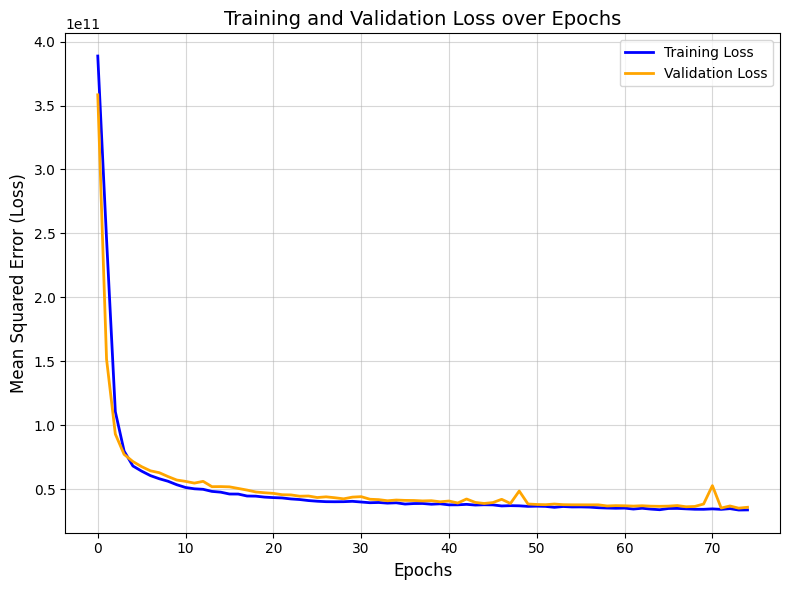

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the training history to a DataFrame
losses = pd.DataFrame(ann_history.history)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(losses['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(losses['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Training and Validation Loss over Epochs', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Mean Squared Error (Loss)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


## Evaluating Models on Test Set

In [ ]:
# Evaluate traditional models on the test set
final_r2_results = []
n = len(y_test)  # Number of test samples

for model_name, model in models.items():
    y_pred_test = model.predict(X_test_scaled)

    # R-squared
    r2_test = r2_score(y_test, y_pred_test)

    # Adjusted R-squared
    adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - k - 1)

    print(f"{model_name} R-squared (Test): {r2_test}")
    print(f"{model_name} Adjusted R-squared (Test): {adjusted_r2_test}")

    final_r2_results.append((model_name, r2_test, adjusted_r2_test))

# Evaluate ANN on the test set
y_pred_test_ann = ann_model.predict(X_test_scaled).flatten()

# R-squared
r2_test_ann = r2_score(y_test, y_pred_test_ann)

# Adjusted R-squared
adjusted_r2_test_ann = 1 - (1 - r2_test_ann) * (n - 1) / (n - k - 1)

print(f"ANN R-squared (Test): {r2_test_ann}")
print(f"ANN Adjusted R-squared (Test): {adjusted_r2_test_ann}")

final_r2_results.append(("ANN", r2_test_ann, adjusted_r2_test_ann))


LinearRegression R-squared (Test): 0.711059165193832
LinearRegression Adjusted R-squared (Test): 0.7098507695092338
KNN R-squared (Test): 0.712223357294234
KNN Adjusted R-squared (Test): 0.7110198304427693
RandomForest R-squared (Test): 0.8712877351985986
RandomForest Adjusted R-squared (Test): 0.8707494404108604
GradientBoosting R-squared (Test): 0.869563160055846
GradientBoosting Adjusted R-squared (Test): 0.8690176528255963
DecisionTree R-squared (Test): 0.7526209995885551
DecisionTree Adjusted R-squared (Test): 0.7515864219846039
XGBoost R-squared (Test): 0.8717407590819057
XGBoost Adjusted R-squared (Test): 0.8712043589107799
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ANN R-squared (Test): 0.7622709534002858
ANN Adjusted R-squared (Test): 0.7612767334098596


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model Performance Metrics:
              Model        R2  Adjusted R2           MSE           RMSE  \
0  LinearRegression  0.711059     0.709851  4.316815e+10  207769.469819   
1               KNN  0.712223     0.711020  4.299422e+10  207350.477959   
2      RandomForest  0.871288     0.870749  1.922979e+10  138671.507254   
3  GradientBoosting  0.869563     0.869018  1.948744e+10  139597.424007   
4      DecisionTree  0.752621     0.751586  3.695876e+10  192246.607676   
5           XGBoost  0.871741     0.871204  1.916210e+10  138427.253608   
6               ANN  0.762271     0.761277  3.551704e+10  188459.656096   

             MAE  
0  127177.856056  
1  103042.935415  
2   71901.826765  
3   80507.819470  
4  104350.619246  
5   68961.623898  
6  107870.368812  


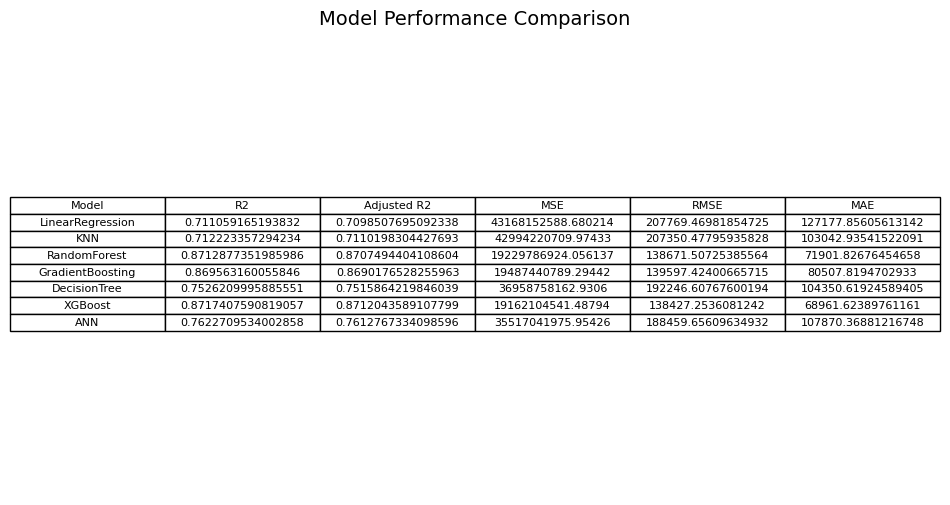

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

# Initialize a list to store results
final_results = []

# Number of test samples and predictors for Adjusted R-squared calculation
n = len(y_test)
k = X_test_scaled.shape[1]  # Number of predictors

# Evaluate traditional models on the test set
for model_name, model in models.items():
    # Predictions
    y_pred_test = model.predict(X_test_scaled)

    # Metrics
    r2_test = r2_score(y_test, y_pred_test)
    adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - k - 1)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Append results
    final_results.append({
        'Model': model_name,
        'R2': r2_test,
        'Adjusted R2': adjusted_r2_test,
        'MSE': mse_test,
        'RMSE': rmse_test,
        'MAE': mae_test
    })

# Evaluate ANN on the test set
y_pred_test_ann = ann_model.predict(X_test_scaled).flatten()
r2_test_ann = r2_score(y_test, y_pred_test_ann)
adjusted_r2_test_ann = 1 - (1 - r2_test_ann) * (n - 1) / (n - k - 1)
mse_test_ann = mean_squared_error(y_test, y_pred_test_ann)
rmse_test_ann = np.sqrt(mse_test_ann)
mae_test_ann = mean_absolute_error(y_test, y_pred_test_ann)

# Append ANN results
final_results.append({
    'Model': 'ANN',
    'R2': r2_test_ann,
    'Adjusted R2': adjusted_r2_test_ann,
    'MSE': mse_test_ann,
    'RMSE': rmse_test_ann,
    'MAE': mae_test_ann
})

# Convert results to a DataFrame
final_results_df = pd.DataFrame(final_results)

# Display results as a table
print("\nModel Performance Metrics:")
print(final_results_df)

# Optionally visualize the results in a table format
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=final_results_df.values, colLabels=final_results_df.columns, loc='center', cellLoc='center')
plt.title('Model Performance Comparison', fontsize=14)
plt.show()


## Visualize R-squared and Adjusted R-squared Comparison

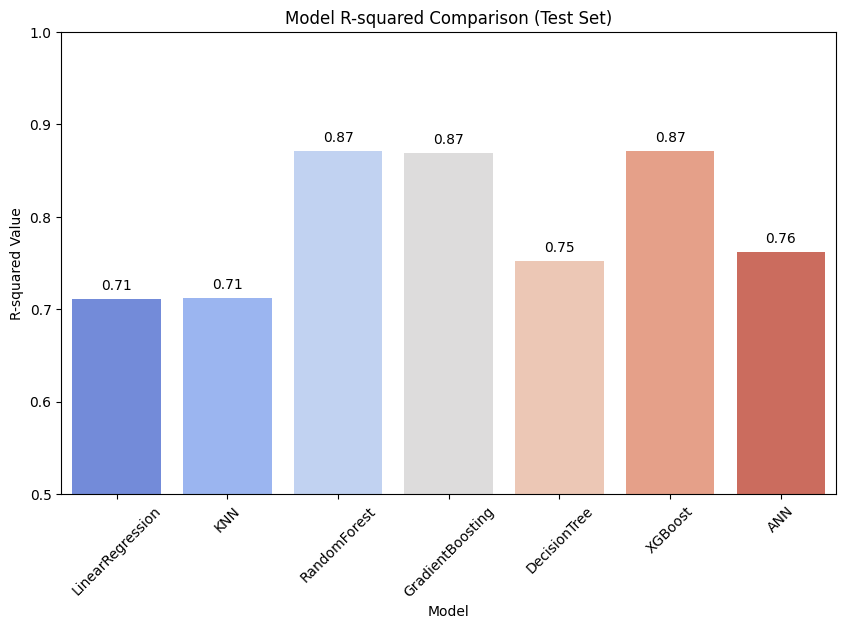

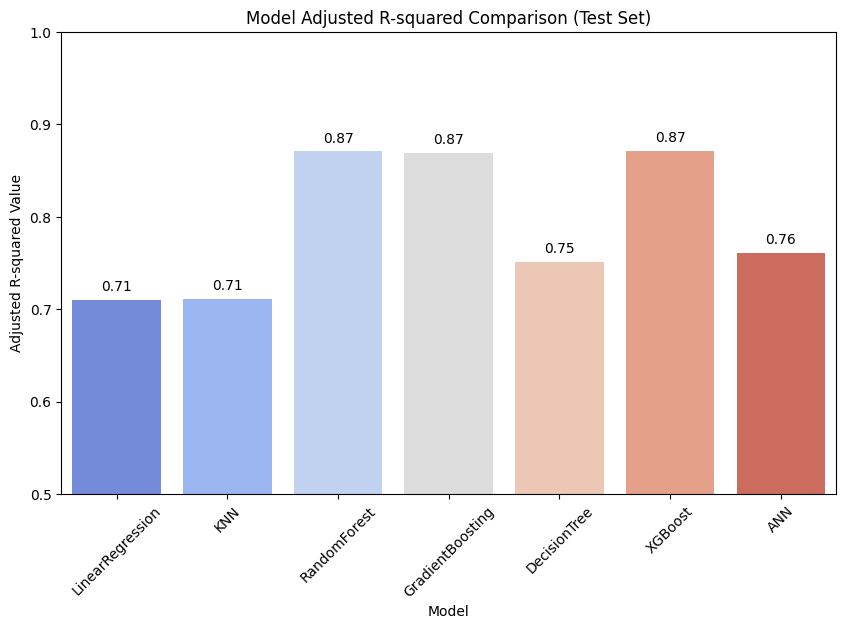

In [ ]:
# Prepare results for visualization
results_df = pd.DataFrame(final_r2_results, columns=["Model", "R-squared", "Adjusted R-squared"])

# Plot R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R-squared", data=results_df, palette="coolwarm")

# Add labels
for index, row in results_df.iterrows():
    plt.text(index, row["R-squared"] + 0.01, f"{row['R-squared']:.2f}", ha='center', fontsize=10)

plt.title("Model R-squared Comparison (Test Set)")
plt.ylabel("R-squared Value")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plot Adjusted R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Adjusted R-squared", data=results_df, palette="coolwarm")

# Add labels
for index, row in results_df.iterrows():
    plt.text(index, row["Adjusted R-squared"] + 0.01, f"{row['Adjusted R-squared']:.2f}", ha='center', fontsize=10)

plt.title("Model Adjusted R-squared Comparison (Test Set)")
plt.ylabel("Adjusted R-squared Value")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.show()



## Predicting Price Using an Example

In [ ]:
# Example input to predict house price
example_index =11  # Index of the example in the test set
example_input = X_test.iloc[example_index]  # Use the first row from the test set
example_scaled = scaler.transform([example_input])  # Scale the input data

# Get the actual price from the test set
actual_price = y_test.iloc[example_index]
print(f"Actual Price: {actual_price}")

# Predict price using Random Forest
rf_prediction = models['RandomForest'].predict(example_scaled)[0]
print(f"Predicted Price (Random Forest): {rf_prediction}")

# Predict price using Gradient Boosting
gb_prediction = models['GradientBoosting'].predict(example_scaled)[0]
print(f"Predicted Price (Gradient Boosting): {gb_prediction}")

# Predict price using XGBoost
xgb_prediction = models['XGBoost'].predict(example_scaled)[0]
print(f"Predicted Price (XGBoost): {xgb_prediction}")

Actual Price: 270000.0
Predicted Price (Random Forest): 295797.08
Predicted Price (Gradient Boosting): 301381.6330560958
Predicted Price (XGBoost): 284399.75


## Feature Importance Method  


Feature Importance:
          Feature  Importance
9           grade    0.362408
3     sqft_living    0.218863
14            lat    0.157361
15           long    0.067241
6      waterfront    0.033178
16  sqft_living15    0.030853
11       yr_built    0.030232
2       bathrooms    0.019059
13        zipcode    0.015383
17     sqft_lot15    0.014226
4        sqft_lot    0.014104
7            view    0.012816
10  sqft_basement    0.009728
1        bedrooms    0.004820
8       condition    0.002847
5          floors    0.002628
0            date    0.002211
12   yr_renovated    0.002044


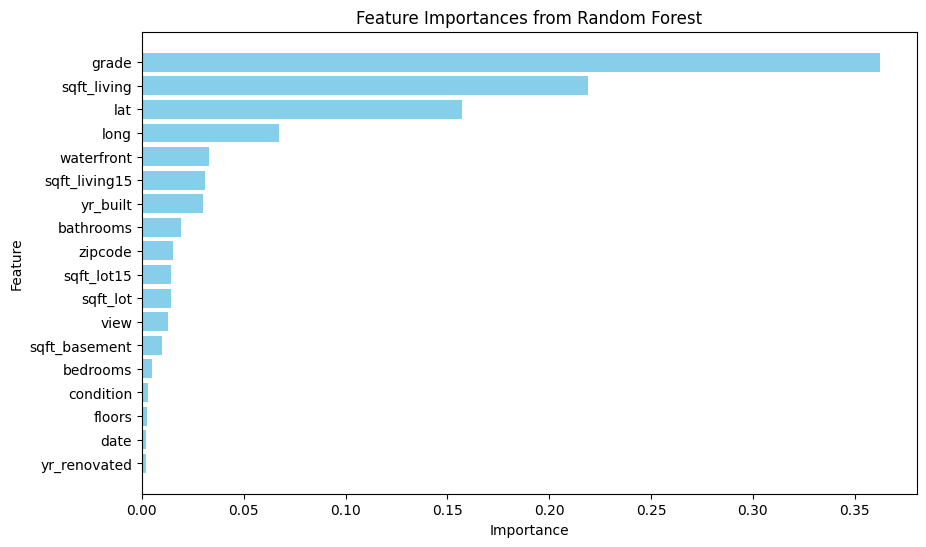


Top Selected Features: ['grade', 'sqft_living', 'lat', 'long', 'waterfront', 'sqft_living15', 'yr_built', 'bathrooms', 'zipcode', 'sqft_lot15']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Train Random Forest model to calculate feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Select top 10 features
top_features = feature_importance_df['Feature'].head(10).tolist()
print("\nTop Selected Features:", top_features)

# Filter datasets to use only the top features
X_train_top = X_train[top_features]
X_valid_top = X_valid[top_features]
X_test_top = X_test[top_features]


In [ ]:
# Training and evaluating models with top features
for model_name, model in models.items():
    model.fit(X_train_top, y_train)
    y_pred_valid = model.predict(X_valid_top)

    # R-squared
    r2 = r2_score(y_valid, y_pred_valid)

    # Adjusted R-squared
    k = X_valid_top.shape[1]  # Number of predictors
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

    print(f"{model_name} R-squared (Validation): {r2}")
    print(f"{model_name} Adjusted R-squared (Validation): {adjusted_r2}")


LinearRegression R-squared (Validation): 0.6662175219390147
LinearRegression Adjusted R-squared (Validation): 0.6654434438359048
KNN R-squared (Validation): 0.5570966887103419
KNN Adjusted R-squared (Validation): 0.5560695474503937
RandomForest R-squared (Validation): 0.8745670636193308
RandomForest Adjusted R-squared (Validation): 0.8742761709097281
GradientBoosting R-squared (Validation): 0.8697239151206932
GradientBoosting Adjusted R-squared (Validation): 0.8694217906195817
DecisionTree R-squared (Validation): 0.7732712091518248
DecisionTree Adjusted R-squared (Validation): 0.7727454002676686
XGBoost R-squared (Validation): 0.8865453175270755
XGBoost Adjusted R-squared (Validation): 0.8862822036994482


In [ ]:
# Train ANN with selected features
ann_model, ann_history = build_and_train_ann(X_train_top, y_train, X_valid_top, y_valid, epochs=75, batch_size=32)

# Evaluate ANN on the validation set
y_pred_valid_ann = ann_model.predict(X_valid_top).flatten()

# R-squared
r2_ann_valid = r2_score(y_valid, y_pred_valid_ann)

# Adjusted R-squared
adjusted_r2_ann_valid = 1 - (1 - r2_ann_valid) * (n - 1) / (n - k - 1)

print(f"ANN R-squared (Validation): {r2_ann_valid}")
print(f"ANN Adjusted R-squared (Validation): {adjusted_r2_ann_valid}")


Epoch 1/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 179263422464.0000 - mse: 179263422464.0000 - val_loss: 129284177920.0000 - val_mse: 129284177920.0000
Epoch 2/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 128573030400.0000 - mse: 128573030400.0000 - val_loss: 84148371456.0000 - val_mse: 84148371456.0000
Epoch 3/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 82421760000.0000 - mse: 82421760000.0000 - val_loss: 69749022720.0000 - val_mse: 69749022720.0000
Epoch 4/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 72881979392.0000 - mse: 72881979392.0000 - val_loss: 70353567744.0000 - val_mse: 70353567744.0000
Epoch 5/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66323755008.0000 - mse: 66323755008.0000 - val_loss: 64879968256.0000 - val_mse: 64879968256.0000
Epoch 6/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 63361921024.0000 - mse: 63361921024.0000 - val_loss: 63120707584.0000 - val_mse: 63120707584.0000
Epoch 7/75
433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model Performance Metrics:
              Model  Adjusted R2           MSE           RMSE
0  LinearRegression     0.693719  4.565298e+10  213665.591404
1               KNN     0.541882  6.828507e+10  261314.127951
2      RandomForest     0.867788  1.970691e+10  140381.303774
3  GradientBoosting     0.864747  2.016025e+10  141986.791433
4      DecisionTree     0.759742  3.581177e+10  189239.989007
5           XGBoost     0.868233  1.964069e+10  140145.240682
6               ANN     0.586464  6.163987e+10  248273.789084


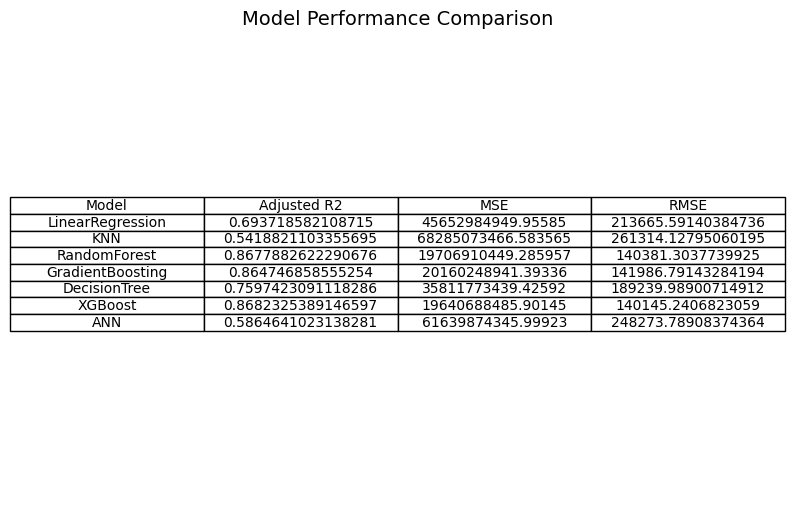

In [ ]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Initialize a list to store results
results = []

# Number of test samples and predictors for adjusted R-squared calculation
n = len(y_test)
k = X_test_top.shape[1]

# Evaluate traditional models on the test set
for model_name, model in models.items():
    # Predictions
    y_pred_test = model.predict(X_test_top)

    # Metrics
    r2_test = r2_score(y_test, y_pred_test)
    adjusted_r2_test = 1 - (1 - r2_test) * (n - 1) / (n - k - 1)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    # Append results
    results.append({
        'Model': model_name,
        'Adjusted R2': adjusted_r2_test,
        'MSE': mse_test,
        'RMSE': rmse_test
    })

# Evaluate ANN on the test set
y_pred_test_ann = ann_model.predict(X_test_top).flatten()
r2_test_ann = r2_score(y_test, y_pred_test_ann)
adjusted_r2_test_ann = 1 - (1 - r2_test_ann) * (n - 1) / (n - k - 1)
mse_test_ann = mean_squared_error(y_test, y_pred_test_ann)
rmse_test_ann = np.sqrt(mse_test_ann)

# Append ANN results
results.append({
    'Model': 'ANN',
    'Adjusted R2': adjusted_r2_test_ann,
    'MSE': mse_test_ann,
    'RMSE': rmse_test_ann
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results as a table
print("\nModel Performance Metrics:")
print(results_df)

# Optionally, display the DataFrame in tabular form using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center', cellLoc='center')
plt.title('Model Performance Comparison', fontsize=14)
plt.show()


## Bar chart visualization for different models using feature importance

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Model Performance Metrics:
              Model        R2  Adjusted R2           MSE           RMSE  \
0  LinearRegression  0.694427     0.693719  4.565298e+10  213665.591404   
1               KNN  0.542942     0.541882  6.828507e+10  261314.127951   
2      RandomForest  0.868094     0.867788  1.970691e+10  140381.303774   
3  GradientBoosting  0.865060     0.864747  2.016025e+10  141986.791433   
4      DecisionTree  0.760298     0.759742  3.581177e+10  189239.989007   
5           XGBoost  0.868537     0.868233  1.964069e+10  140145.240682   
6               ANN  0.587421     0.586464  6.163987e+10  248273.789084   

             MAE  
0  132452.668130  
1  159754.374693  
2   73999.836234  
3   82775.329149  
4  104924.254800  
5   72640.185973  
6  156812.559406  


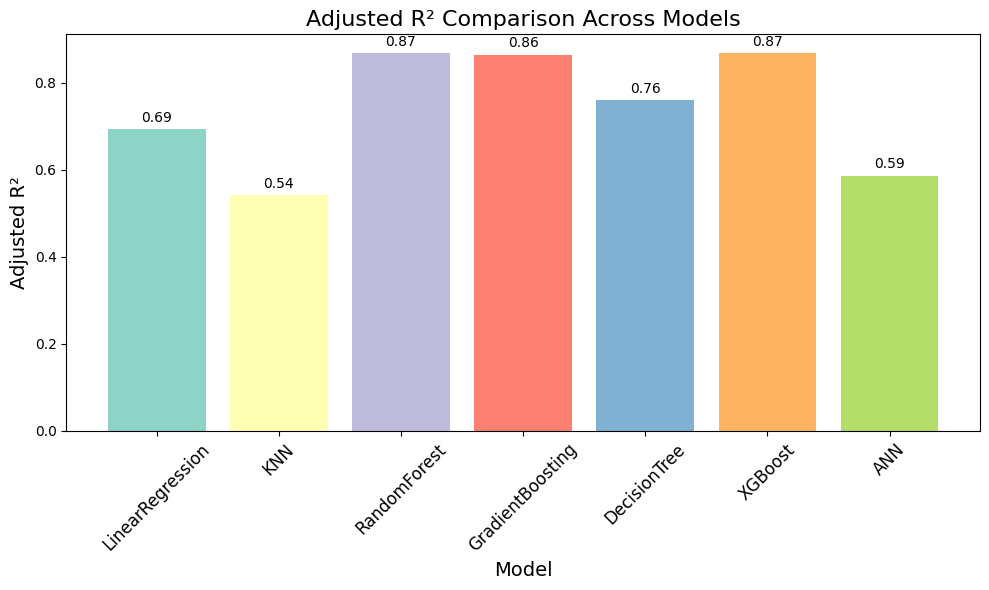

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a list to store results
results = []

# Number of test samples and predictors for Adjusted R-squared calculation
n = len(y_test)
k = X_test_top.shape[1]  # Number of predictors

# Evaluate all models on the test set
for model_name, model in models.items():
    # Predictions and metrics
    y_pred = model.predict(X_test_top)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Save results
    results.append({
        "Model": model_name,
        "R2": r2,
        "Adjusted R2": adjusted_r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    })

# Evaluate ANN on the test set
y_pred_ann = ann_model.predict(X_test_top).flatten()
r2_ann = r2_score(y_test, y_pred_ann)
adjusted_r2_ann = 1 - (1 - r2_ann) * (n - 1) / (n - k - 1)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)

# Save ANN results
results.append({
    "Model": "ANN",
    "R2": r2_ann,
    "Adjusted R2": adjusted_r2_ann,
    "MSE": mse_ann,
    "RMSE": rmse_ann,
    "MAE": mae_ann
})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print results
print("\nModel Performance Metrics:")
print(results_df)

# Visualization for Adjusted R²
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set3", len(results_df))
bars = plt.bar(results_df["Model"], results_df["Adjusted R2"], color=colors)

# Add value labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{bar.get_height():.2f}",
        ha="center", va="bottom", fontsize=10
    )

# Set titles and labels
plt.title("Adjusted R² Comparison Across Models", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Adjusted R²", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Example index for testing (change the index to test other examples)
example_index = 0  # Example test case index

# Filter the test dataset to include only top features
example_input = X_test_top.iloc[example_index]  # Select the test example
actual_price = y_test.iloc[example_index]  # Actual price of the example

# Train a model using only the top features (Optional: You can skip this if using pre-trained)
rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train)

# Predict the price for the example
predicted_price = rf_model_top.predict([example_input])[0]

# Display the prediction results
print(f"\nExample Input Features:\n{example_input}\n")
print(f"Actual Price: {actual_price}")
print(f"Predicted Price: {predicted_price:.2f}")




Example Input Features:
grade                8.000
sqft_living       2640.000
lat                 47.733
long              -121.968
waterfront           0.000
sqft_living15     2400.000
yr_built          1999.000
bathrooms            2.500
zipcode          98019.000
sqft_lot15       11816.000
Name: 4984, dtype: float64

Actual Price: 570000.0
Predicted Price: 518487.25


## Ensemble Modeling

In [ ]:
from sklearn.ensemble import StackingRegressor
# Define the scaler and fit it on the training data
scaler_selected = RobustScaler()
X_train_scaled = scaler_selected.fit_transform(X_train)
X_test_scaled = scaler_selected.transform(X_test)
# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))
]

# Define meta-model
meta_model = LinearRegression()

# Create Stacking Regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train_scaled, y_train)

# Evaluate Stacking Regressor
y_pred_stack = stacking_model.predict(X_test_scaled)
r2_stack = r2_score(y_test, y_pred_stack)
print(f"Stacking Regressor R-squared: {r2_stack:.4f}")


Stacking Regressor R-squared: 0.8762


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate metrics for the entire test set
r2_stack = r2_score(y_test, y_pred_stack)
mse_stack = mean_squared_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mse_stack)

# Print the performance metrics
print(f"\nPerformance Metrics for Stacking Regressor on Test Set:")
print(f"R²: {r2_stack:.4f}")
print(f"MSE: {mse_stack:.4f}")
print(f"RMSE: {rmse_stack:.4f}")



Performance Metrics for Stacking Regressor on Test Set:
R²: 0.8762
MSE: 18501641500.9189
RMSE: 136020.7392


In [ ]:
# Example prediction
example_index = 11  # Changing index to test other examples
example_input = X_test.iloc[example_index]  # Selecting a test example
example_scaled = scaler_selected.transform([example_input])  # Scaling the input

# Predict the price for the example
actual_price = y_test.iloc[example_index]
predicted_price_stack = stacking_model.predict(example_scaled)[0]

# Print example output
print(f"\nExample Output for Stacking Regressor:")
print(f"Actual Price: {actual_price}")
print(f"Predicted Price: {predicted_price_stack:.2f}")


Example Output for Stacking Regressor:
Actual Price: 270000.0
Predicted Price: 281766.29
